<a href="https://colab.research.google.com/github/HarshitGupta1511/Fake-Job-Detection/blob/main/fake_job_detection_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('/kaggle/fake_job_postings_dataset.csv')


In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())  # Checking for missing values


   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [4]:
# Dropping unnecessary columns (Modify based on dataset understanding)
df.drop(['job_id'], axis=1, inplace=True, errors='ignore')


In [5]:
# Handling missing values by filling with empty string
df.fillna("", inplace=True)

# Encoding the target variable
label_encoder = LabelEncoder()
df['fraudulent'] = label_encoder.fit_transform(df['fraudulent'])

In [6]:
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']
df['text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

vectorizer = TfidfVectorizer(max_features=5000)
X_text = vectorizer.fit_transform(df['text']).toarray()

In [7]:
X = X_text  # Using only text features for simplicity
y = df['fraudulent']

In [8]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naïve Bayes': MultinomialNB(),
}

In [10]:
results = {}
confusion_matrices = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f'\n{name} Results:')
    print('Accuracy:', acc)
    print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
    print('Classification Report:\n', classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.9711968680089486
Confusion Matrix:
 [[3395    0]
 [ 103   78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      3395
           1       1.00      0.43      0.60       181

    accuracy                           0.97      3576
   macro avg       0.99      0.72      0.79      3576
weighted avg       0.97      0.97      0.97      3576


Random Forest Results:
Accuracy: 0.9804250559284117
Confusion Matrix:
 [[3395    0]
 [  70  111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       1.00      0.61      0.76       181

    accuracy                           0.98      3576
   macro avg       0.99      0.81      0.88      3576
weighted avg       0.98      0.98      0.98      3576


KNN Results:
Accuracy: 0.9798657718120806
Confusion Matrix:
 [[3381   14]
 [  58  123]]
Class

<ipython-input-11-3513604506cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')


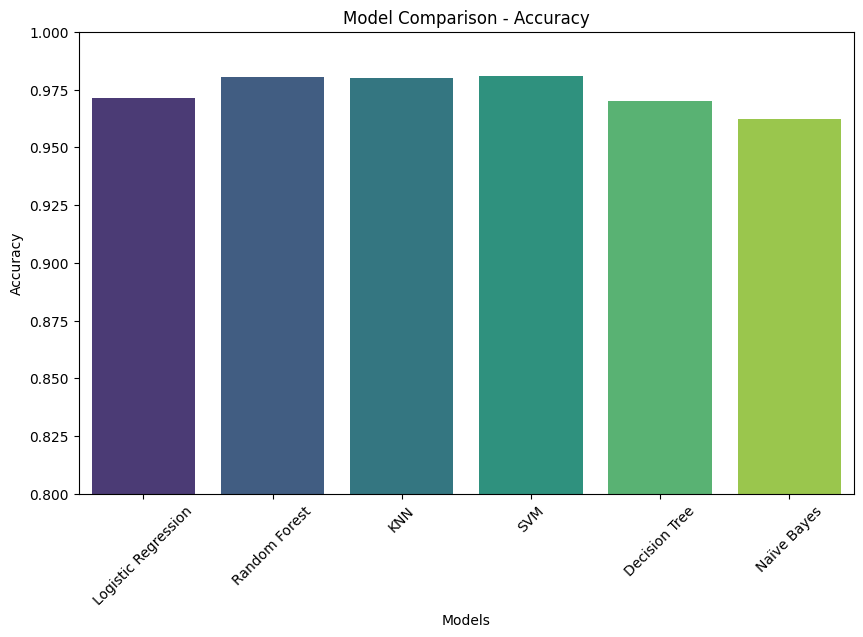

In [11]:
# Bar Plot - Accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)
plt.show()


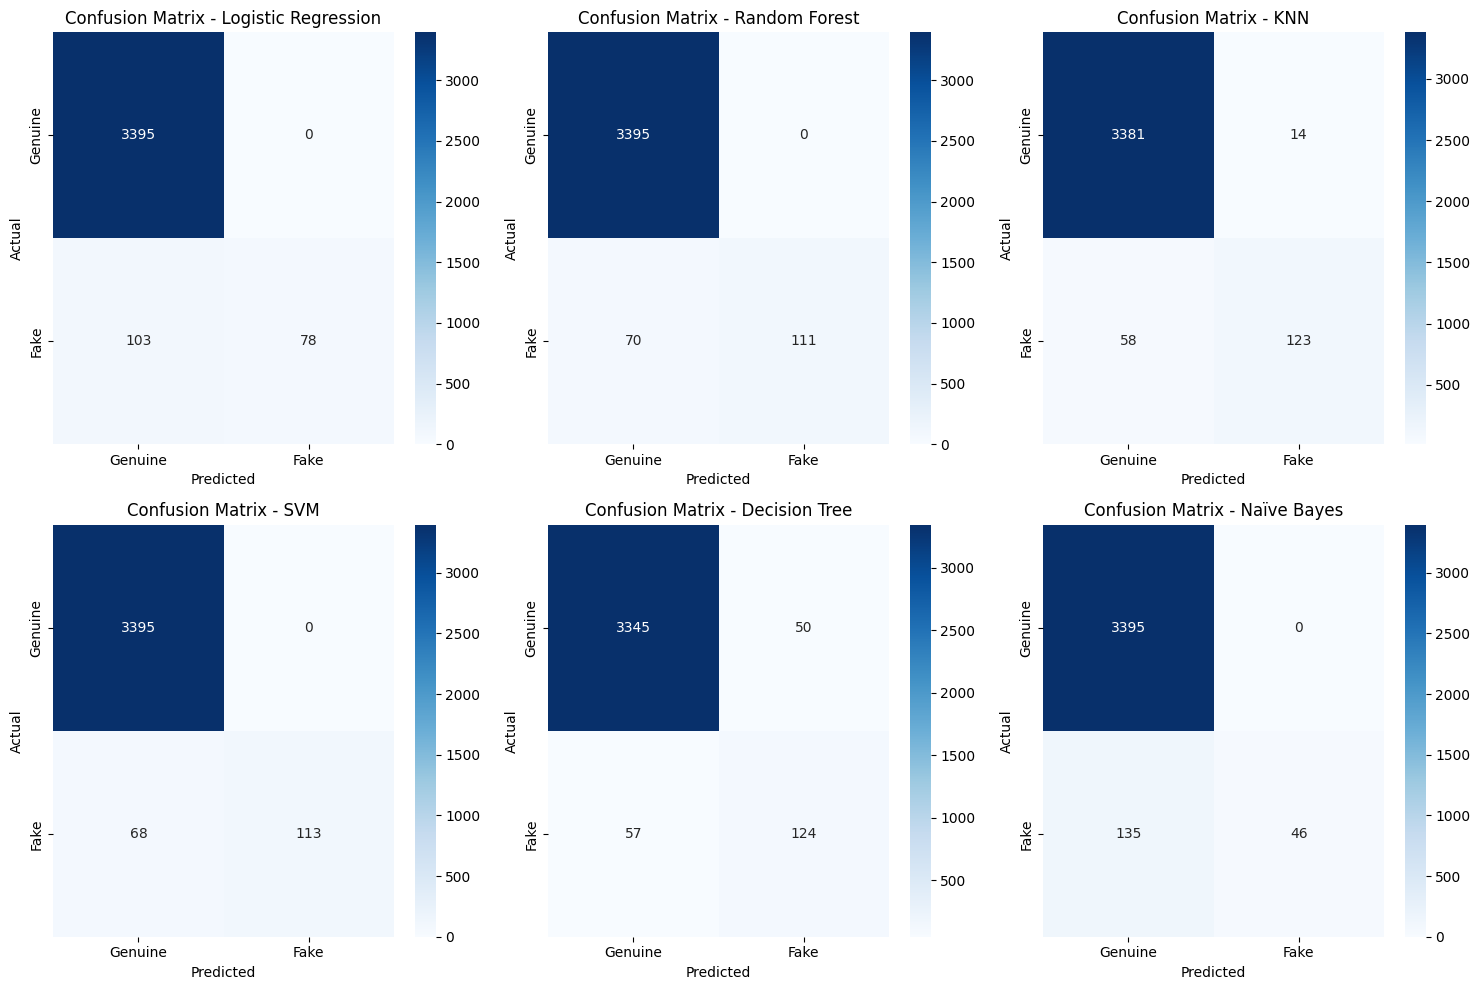

In [12]:
# Confusion matrix heatmaps
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuine', 'Fake'], yticklabels=['Genuine', 'Fake'], ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

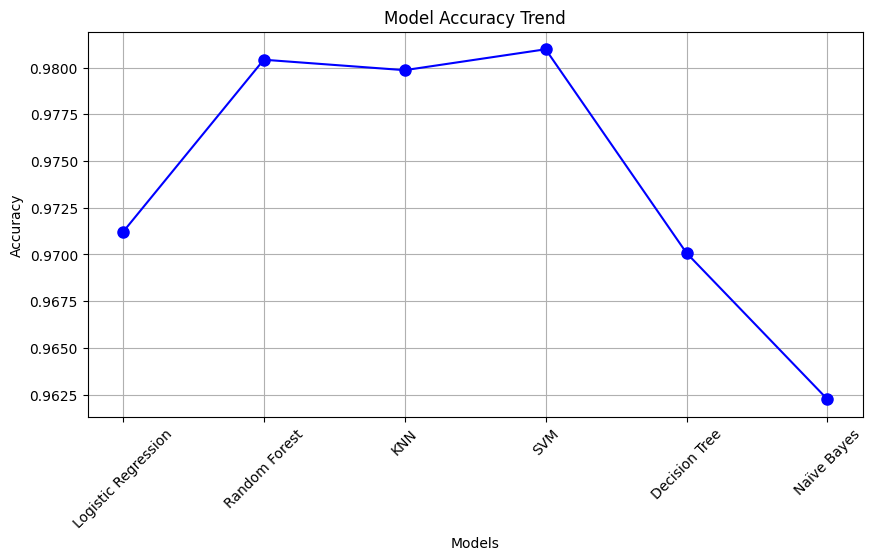

In [13]:
# Line Plot - Accuracy Trends Across Models
plt.figure(figsize=(10, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [14]:
# 📊 Bar Chart (Accuracy Comparison)
# 🔥 Confusion Matrix Heatmaps (Side-by-side for all models)
# 📈 Line Plot (Trend of Accuracy Across Models)

